In [6]:
%matplotlib inline
# imported necessary libraries
import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
#from sklearn.model_selection import cross_val_score
#from sklearn.cross_validation import cross_val_score
#from sklearn.cross_validation import train_test_split
from collections import Counter
from sklearn.metrics import accuracy_score
from sklearn import model_selection
#from sklearn import cross_validation

from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
 

# using the SQLite Table to read data.
con = sqlite3.connect('database.sqlite') 
filtered_data = pd.read_sql_query("""
SELECT *
FROM Reviews
WHERE Score != 3 limit 1000
""", con) 

def partition(x):
    if x < 3:
        return 'negative'
    return 'positive'




In [ ]:
https://www.kaggle.com/premvardhan/amazon-fine-food-reviews-analysis-naive-bayes

In [7]:


#changing reviews with score less than 3 to be positive and vice-versa
actualScore = filtered_data['Score']
positiveNegative = actualScore.map(partition) 
filtered_data['Score'] = positiveNegative


In [9]:


#Sorting data according to ProductId in ascending order
sorted_data=filtered_data.sort_values('ProductId', axis=0, ascending=True, inplace=False, kind='quicksort', na_position='last')



In [10]:
final = sorted_data.drop_duplicates(subset = {"UserId","ProfileName","Time","Text"}, keep='first', inplace=False)
final.shape

(998, 10)

In [11]:
(final['Id'].size*1.0)/(filtered_data['Id'].size*1.0)*100

99.8

In [12]:


final = final[final.HelpfulnessNumerator<=final.HelpfulnessDenominator]



In [13]:
#Before starting the next phase of preprocessing lets see the number of entries left
print(final.shape)

#How many positive and negative reviews are present in our dataset?
final['Score'].value_counts()

(998, 10)


positive    841
negative    157
Name: Score, dtype: int64

In [14]:
import re
i=0;
for sent in final['Text'].values:
    if (len(re.findall('<.*?>', sent))):
        print(i)
        print(sent)
        break;
    i += 1;    

0
I don't know if it's the cactus or the tequila or just the unique combination of ingredients, but the flavour of this hot sauce makes it one of a kind!  We picked up a bottle once on a trip we were on and brought it back home with us and were totally blown away!  When we realized that we simply couldn't find it anywhere in our city we were bummed.<br /><br />Now, because of the magic of the internet, we have a case of the sauce and are ecstatic because of it.<br /><br />If you love hot sauce..I mean really love hot sauce, but don't want a sauce that tastelessly burns your throat, grab a bottle of Tequila Picante Gourmet de Inclan.  Just realize that once you taste it, you will never want to use any other sauce.<br /><br />Thank you for the personal, incredible service!


In [18]:
import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

stop = set(stopwords.words('english')) #set of stopwords
sno = nltk.stem.SnowballStemmer('english') #initialising the snowball stemmer

def cleanhtml(sentence): #function to clean the word of any html-tags
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', sentence)
    return cleantext
def cleanpunc(sentence): #function to clean the word of any punctuation or special characters
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    return  cleaned
print(stop)
print('************************************')
print(sno.stem('tasty'))

{"shouldn't", 'here', 'yourself', 'haven', 'theirs', 'she', 'be', 'should', "haven't", 'only', 'y', 'under', 'against', 'you', "mightn't", 'who', 'until', 'what', 'mustn', "you're", 'was', 'before', 'needn', 'themselves', 'our', 'during', 'couldn', 'few', 'were', 'shan', 'as', 'did', 'but', 'those', 'in', 'so', 'o', "needn't", 'yours', 'had', 'a', 'then', 'mightn', "that'll", 'ours', 't', 'has', 'its', "should've", 'itself', 'by', 'we', 'is', "aren't", "couldn't", 'their', 'if', 'doesn', 'this', 'hasn', 've', 'while', "you'd", 'for', 'will', 'whom', 'that', 'all', 'at', "didn't", 'after', "weren't", "shan't", "you've", 'any', 'once', 'can', 'ain', 'yourselves', 'which', 'to', 'aren', "mustn't", 'off', 'have', 'and', 'or', 'myself', 'my', 'hers', 'further', 'hadn', 'an', 'down', 'over', 'being', 'when', 'very', 'd', 'most', 'other', 'than', "hasn't", 'isn', 'just', 'ma', 'doing', 'into', "wasn't", 'them', 'where', "she's", 'i', 'am', 'why', 'how', 'does', 'such', 'll', 'these', 'with', 

In [19]:
#Code for implementing step-by-step the checks mentioned in the pre-processing phase
# this code takes a while to run as it needs to run on 500k sentences.
i=0
str1=' '
final_string=[]
all_positive_words=[] # store words from +ve reviews here
all_negative_words=[] # store words from -ve reviews here.
s=''
for sent in final['Text'].values:
    filtered_sentence=[]
    #print(sent);
    sent=cleanhtml(sent) # remove HTMl tags
    for w in sent.split():
        for cleaned_words in cleanpunc(w).split():
            if((cleaned_words.isalpha()) & (len(cleaned_words)>2)):    
                if(cleaned_words.lower() not in stop):
                    s=(sno.stem(cleaned_words.lower())).encode('utf8')
                    filtered_sentence.append(s)
                    if (final['Score'].values)[i] == 'positive': 
                        all_positive_words.append(s) #list of all words used to describe positive reviews
                    if(final['Score'].values)[i] == 'negative':
                        all_negative_words.append(s) #list of all words used to describe negative reviews reviews
                else:
                    continue
            else:
                continue 
    #print(filtered_sentence)
    str1 = b" ".join(filtered_sentence) #final string of cleaned words
    #print("***********************************************************************")
    
    final_string.append(str1)
    i+=1

In [20]:
final['CleanedText']=final_string #adding a column of CleanedText which displays the data after pre-processing of the review 

In [21]:
final.head(3) #below the processed review can be seen in the CleanedText Column 


# store final table into an SQlLite table for future.
conn = sqlite3.connect('final.sqlite')
c=conn.cursor()
conn.text_factory = str
final.to_sql('Reviews', conn, schema=None, if_exists='replace', index=True, index_label=None, chunksize=None, dtype=None)

In [22]:
con = sqlite3.connect("final.sqlite")
cleaned_data = pd.read_sql_query("select * from Reviews", con)

In [23]:
cleaned_data.shape

(998, 12)

In [24]:
cleaned_data["Score"].value_counts()

positive    841
negative    157
Name: Score, dtype: int64

In [25]:
# To randomly sample 100k points from both class

data_pos = cleaned_data[cleaned_data["Score"] == "positive"].sample(n = 50)
data_neg = cleaned_data[cleaned_data["Score"] == "negative"].sample(n = 50)
final_100k = pd.concat([data_pos, data_neg])
final_100k.shape

(100, 12)

In [30]:
final_100k["Time"] = pd.to_datetime(final_100k["Time"], unit = "s")
final_100k = final_100k.sort_values(by = "Time")
#final_100k.head()

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X = final_100k["CleanedText"]
# class label
y = final_100k["Score"]
print("shape of y:", y.shape)

shape of y: (100,)


In [34]:
# Train Vectorizor
from sklearn.feature_extraction.text import CountVectorizer 

bow = CountVectorizer()
#X_train = bow.fit_transform(X_train)

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
X_train = bow.fit_transform(X_train)
logreg.fit(X_train, y_train)

/root/anaconda2/envs/py34/lib/python3.4/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [54]:
# Test Vectorizor
X_test = bow.transform(X_test)

In [55]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.57


In [56]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[8 9]
 [4 9]]


In [87]:
y_pred

array(['positive', 'negative', 'positive', 'negative', 'positive',
       'positive', 'negative', 'positive', 'positive', 'positive',
       'negative', 'positive', 'positive', 'positive', 'positive',
       'positive', 'positive', 'negative', 'positive', 'negative',
       'negative', 'positive', 'negative', 'negative', 'negative',
       'negative', 'negative', 'positive', 'positive', 'positive'],
      dtype=object)

In [57]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    negative       0.67      0.47      0.55        17
    positive       0.50      0.69      0.58        13

   micro avg       0.57      0.57      0.57        30
   macro avg       0.58      0.58      0.57        30
weighted avg       0.59      0.57      0.56        30



In [86]:
if(y_pred == 'negative'):
	y_pred1= 0
else:
    y_pred1=1

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [74]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test,y_pred)

TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [73]:
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(y_pred)[:,1])


ValueError: could not convert string to float: 'positive'

In [ ]:
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X = final_100k["CleanedText"]
# class label
y = final_100k["Score"]
print("shape of y:", y.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

shape of y: (100,)


/root/anaconda2/envs/py34/lib/python3.4/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


ValueError: could not convert string to float: b'educ felin nutrit allow cat becom addict dri cat food alway offer can dri wish would fed premium qualiti can food limit dri food two year old cat two year old cat good qualiti dri food eat well innova innova manufactur recent purchas began look replac offer sever sampl local holist pet store holist select one usual well innova would eat finicki cat recommend tri holist select good qualiti food palat finicki eater'

In [70]:
# Fuction to compute alpha value
def naive_bayes(X_train, y_train):
    
    alpha_values = np.arange(1, 500, 0.5)
        

    # empty list that will hold cv scores
    cv_scores = []

    # perform 10-fold cross validation
    for alpha in alpha_values:
        mnb = MultinomialNB(alpha = alpha)
        scores = cross_val_score(mnb, X_train, y_train, cv = 10, scoring = 'accuracy')
        cv_scores.append(scores.mean())

    # changing to misclassification error
    MSE = [1 - x for x in cv_scores]

    # determining best alpha
    optimal_alpha = alpha_values[MSE.index(min(MSE))]
    print('\nThe optimal number of alpha is %d.' % optimal_alpha)

    # plot misclassification error vs alpha
    plt.plot(alpha_values, MSE, marker = '*') 

    #for xy in zip(alpha_values, np.round(MSE,3)):
        #plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')
    plt.title("Misclassification Error vs alpha")
    plt.xlabel('value of alpha')
    plt.ylabel('Misclassification Error')
    plt.show()

    #print("the misclassification error for each value of alpha is : ", np.round(MSE,3))
    return optimal_alpha

In [71]:
# 100k data which will use to train model after vectorization
X = final_100k["CleanedText"]
print("shape of X:", X.shape)

shape of X: (100,)


In [72]:
# class label
y = final_100k["Score"]
print("shape of y:", y.shape)

shape of y: (100,)


In [162]:
# split data into train and test where 70% data used to train model and 30% for test
# final_4000[:int(len(final_4000) * 0.75)], final_4000[int(len(final_4000) * 0.75):]
from sklearn.model_selection import train_test_split
X_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
print(X_train.shape, y_train.shape, x_test.shape)

(70,) (70,) (30,)


In [163]:
# Train Vectorizor
from sklearn.feature_extraction.text import CountVectorizer 

bow = CountVectorizer()
X_train = bow.fit_transform(X_train)



In [75]:
# Test Vectorizor
x_test = bow.transform(x_test)

In [165]:
x_test.shape


(70, 1009)

In [166]:
X_train.shape

(70, 1009)

In [167]:
y_train.shape

(70,)


The optimal number of alpha is 1.


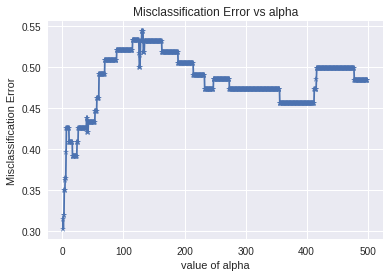

1.5

In [172]:
# To choose optimal_alpha using cross validation

optimal_alpha_bow = naive_bayes(X_train, y_train)
optimal_alpha_bow


In [174]:
# instantiate learning model alpha = optimal_alpha
nb_optimal =  MultinomialNB(alpha = optimal_alpha_bow)

# fitting the model
nb_optimal.fit(X_train, y_train)
#knn_optimal.fit(bow_data, y_train)

# predict the response
pred = nb_optimal.predict(x_test)

ValueError: could not convert string to float: b'food great age dog year old puppi soft hard ever get sick food good especi amazon prime ship'

In [81]:
bow_features = bow.get_feature_names()

In [82]:
# To count feature for each class while fitting the model
# Number of samples encountered for each (class, feature) during fitting

feat_count = nb_optimal.feature_count_
feat_count.shape

(2, 1009)

In [83]:
# Empirical log probability of features given a class(i.e. P(x_i|y))

log_prob = nb_optimal.feature_log_prob_
log_prob

array([[-7.60206845, -7.60206845, -7.60206845, ..., -7.09124282,
        -7.09124282, -7.09124282],
       [-6.9206715 , -6.33288484, -6.9206715 , ..., -7.43149713,
        -7.43149713, -6.9206715 ]])

In [84]:
feature_prob = pd.DataFrame(log_prob, columns = bow_features)
feature_prob_tr = feature_prob.T
feature_prob_tr.shape

(1009, 2)

In [85]:
# To show top 10 feature from both class
# Feature Importance
print("Top 10 Negative Features:-\n",feature_prob_tr[0].sort_values(ascending = False)[0:10])
print("\n\n Top 10 Positive Features:-\n",feature_prob_tr[1].sort_values(ascending = False)[0:10])

Top 10 Negative Features:-
 chip      -4.657629
tast      -5.145333
like      -5.266694
kettl     -5.266694
bag       -5.333385
use       -5.404844
good      -5.404844
product   -5.404844
food      -5.481805
flavor    -5.481805
Name: 0, dtype: float64


 Top 10 Positive Features:-
 chip     -4.816537
use      -5.033602
like     -5.162814
time     -5.162814
flavor   -5.162814
tast     -5.234273
love     -5.311234
one      -5.311234
great    -5.311234
good     -5.311234
Name: 1, dtype: float64


In [86]:
# Accuracy on train data
train_acc_bow = nb_optimal.score(X_train, y_train)
print("Train accuracy", train_acc_bow)

Train accuracy 1.0


In [87]:
# Error on train data
train_err_bow = 1-train_acc_bow
print("Train Error %f%%" % (train_err_bow))

Train Error 0.000000%


In [88]:
# evaluate accuracy on test data
acc_bow = accuracy_score(y_test, pred) * 100
print('\nThe accuracy of the naive bayes classifier for alpha = %d is %f%%' % (optimal_alpha_bow, acc_bow))


The accuracy of the naive bayes classifier for alpha = 1 is 56.666667%


In [89]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, pred)
cm

array([[8, 6],
       [7, 9]])

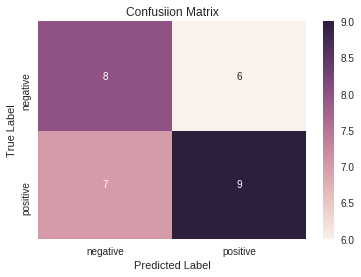

In [90]:
# plot confusion matrix to describe the performance of classifier.
import seaborn as sns
class_label = ["negative", "positive"]
df_cm = pd.DataFrame(cm, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d")
plt.title("Confusiion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [175]:
# To show main classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

             precision    recall  f1-score   support

   negative       0.53      0.57      0.55        14
   positive       0.60      0.56      0.58        16

avg / total       0.57      0.57      0.57        30



In [199]:
# data
X = final_100k["CleanedText"]

In [200]:


# Target/class-label
y = final_100k["Score"]



In [201]:


# Split data
X_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
print(X_train.shape, x_test.shape, y_train.shape, y_test.shape)



(70,) (30,) (70,) (30,)


In [202]:
#from sklearn.feature_extraction.text import TfidfVectorizer

#tfidf = TfidfVectorizer()
#tfidf_data = tfidf.fit_transform(final_4000["CleanedText"])
#tfidf_data


#tf_idf_vect = TfidfVectorizer(ngram_range=(1,2))
#tf_idf_vect = TfidfVectorizer(ngram_range=(1,2))
#tf_idf_vect= TfidfVectorizer(ngram_range=(1,2))

#tf_idf_vect=dfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
#features = tfidf.fit_transform(df.Consumer_complaint_narrative).toarray()

#X_train = tf_idf_vect.fit_transform(X_train)
#X_Train=CountVectorizer(ngram_range=(1,2) )
#y_train.shape


from sklearn.feature_extraction.text import TfidfVectorizer

#tfidf = TfidfVectorizer()
#tfidf_data = tfidf.fit_transform(final_4000["CleanedText"])
#tfidf_data
tf_idf_vect = TfidfVectorizer(ngram_range=(1,2))
X_train = tf_idf_vect.fit_transform(X_train)
X_train

/root/anaconda2/envs/py34/lib/python3.4/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


<70x3315 sparse matrix of type '<class 'numpy.float64'>'
	with 4455 stored elements in Compressed Sparse Row format>

In [203]:
# Convert test text data to its vectorizor
x_test = tf_idf_vect.transform(x_test)
x_test.shape

/root/anaconda2/envs/py34/lib/python3.4/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


(30, 3315)


The optimal number of alpha is 1.


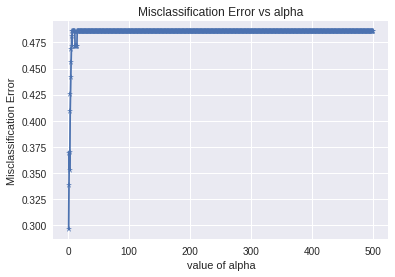

1.0

In [204]:
# To choosing optimal_alpha

optimal_alpha_tfidf = naive_bayes(X_train, y_train)
optimal_alpha_tfidf

In [205]:
# instantiate learning model alpha = optimal_alpha
nb_optimal = MultinomialNB(alpha = optimal_alpha_tfidf)

# fitting the model
nb_optimal.fit(X_train, y_train)
#knn_optimal.fit(bow_data, y_train)
    
# predict the response
pred = nb_optimal.predict(x_test)

In [206]:
tfidf_features = tf_idf_vect.get_feature_names()

In [207]:
# To count feature for each class while fitting the model
# Number of samples encountered for each (class, feature) during fitting

feat_count = nb_optimal.feature_count_
feat_count.shape

(2, 3315)

In [208]:
# Number of samples encountered for each class during fitting

nb_optimal.class_count_

array([36., 34.])

In [209]:
# Empirical log probability of features given a class(i.e. P(x_i|y))

log_prob = nb_optimal.feature_log_prob_
log_prob

array([[-8.18362686, -8.18362686, -8.18362686, ..., -8.02338122,
        -8.00906668, -8.18362686],
       [-8.11263724, -8.11263724, -7.86653797, ..., -8.05931192,
        -8.17370529, -8.04884166]])

In [210]:
feature_prob = pd.DataFrame(log_prob, columns = tfidf_features)
feature_prob_tr = feature_prob.T
feature_prob_tr.shape


(3315, 2)

In [211]:
# To show top 10 feature from both class
print("Top 10 negative features:-\n",feature_prob_tr[0].sort_values(ascending = False)[0:10])
print("\n\n Top 10 positive features:-\n",feature_prob_tr[1].sort_values(ascending = False)[0:10])


Top 10 negative features:-
 chip     -7.285259
realli   -7.499129
tast     -7.512765
kettl    -7.519233
bag      -7.525978
like     -7.601233
look     -7.605094
brand    -7.613934
good     -7.621985
bad      -7.643243
Name: 0, dtype: float64


 Top 10 positive features:-
 chip      -7.365098
tea       -7.435040
great     -7.476286
use       -7.503024
good      -7.504433
time      -7.506053
product   -7.547414
love      -7.558205
healthi   -7.585562
tast      -7.586041
Name: 1, dtype: float64


In [212]:
# Accuracy on train data
train_acc_tfidf = nb_optimal.score(X_train, y_train)
print("Train accuracy", train_acc_tfidf)

Train accuracy 1.0


In [213]:
# Error on train data
train_err_tfidf = 1-train_acc_tfidf
print("Train Error %f%%" % (train_err_tfidf))

Train Error 0.000000%


In [214]:
# evaluate accuracy
acc_tfidf = accuracy_score(y_test, pred) * 100
print('\nThe accuracy of the naive bayes classifier for alpha = %d is %f%%' % (optimal_alpha_tfidf, acc_tfidf))


The accuracy of the naive bayes classifier for alpha = 1 is 63.333333%


In [215]:
#from sklearn.matrics import confusion_matrix
cm = confusion_matrix(y_test, pred)
cm

array([[12,  2],
       [ 9,  7]])

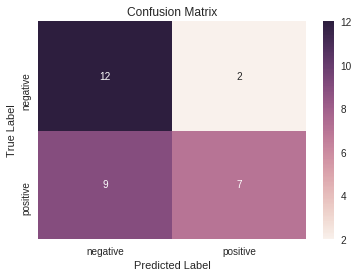

In [216]:
class_label = ["negative", "positive"]
df_cm = pd.DataFrame(cm, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [217]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

             precision    recall  f1-score   support

   negative       0.57      0.86      0.69        14
   positive       0.78      0.44      0.56        16

avg / total       0.68      0.63      0.62        30

